In [105]:
from collections import defaultdict 
  
#Class to represent a graph 
class Graph: 
  
    # A utility function to find the  
    # vertex with minimum dist value, from 
    # the set of vertices still in queue 
    def minDistance(self,dist,queue): 
        # Initialize min value and min_index as -1 
        minimum = float("Inf") 
        min_index = -1
          
        # from the dist array,pick one which 
        # has min value and is till in queue 
        for i in range(len(dist)): 
            if dist[i] < minimum and i in queue: 
                minimum = dist[i] 
                min_index = i 
        return min_index 
  
  
    # Function to print shortest path 
    # from source to j 
    # using parent array 
#     def printPath(self, parent, j): 
          
#         #Base Case : If j is source 
#         if parent[j] == -1 :  
#             print j, 
#             return
#         self.printPath(parent , parent[j]) 
#         print j, 
          
  
    # A utility function to print 
    # the constructed distance 
    # array 
#     def printSolution(self, dist, parent): 
#         src = 0
#         print("Vertex \t\tDistance from Source\tPath") 
#         for i in range(1, len(dist)): 
#             print("\n%d --> %d \t\t%d \t\t\t\t\t" % (src, i, dist[i])), 
#             self.printPath(parent,i) 
  
  
    '''Function that implements Dijkstra's single source shortest path 
    algorithm for a graph represented using adjacency matrix 
    representation'''
    def dijkstra(self, graph, src): 
  
        row = len(graph) 
        col = len(graph[0]) 
  
        # The output array. dist[i] will hold 
        # the shortest distance from src to i 
        # Initialize all distances as INFINITE  
        dist = [float("Inf")] * row 
  
        #Parent array to store  
        # shortest path tree 
        parent = [-1] * row 
  
        # Distance of source vertex  
        # from itself is always 0 
        dist[src] = 0
      
        # Add all vertices in queue 
        queue = [] 
        for i in range(row): 
            queue.append(i)    
        #Find shortest path for all vertices 
        while queue: 
  
            # Pick the minimum dist vertex  
            # from the set of vertices 
            # still in queue 
            u = self.minDistance(dist,queue)  
            # remove min element 
            if(u==-1):
                queue = []
            else:
                queue.remove(u) 
  
            # Update dist value and parent  
            # index of the adjacent vertices of 
            # the picked vertex. Consider only  
            # those vertices which are still in 
            # queue 
            for i in range(col): 
                '''Update dist[i] only if it is in queue, there is 
                an edge from u to i, and total weight of path from 
                src to i through u is smaller than current value of 
                dist[i]'''
                if graph[u][i] and i in queue: 
                    if dist[u] + graph[u][i] < dist[i]: 
                        dist[i] = dist[u] + graph[u][i] 
                        parent[i] = u 
  
  
        # print the constructed distance array 
#         self.printSolution(dist,parent) 
        return dist
  

In [4]:
# this part is for creating WattsStrogatz graph
import random
import numpy
from numpy import linspace
import matplotlib.pyplot as plt

def WattsStrogatz(n,k,B):
    #regular matrix
    G = regular(n,k)
    graph = [[0]*len(G) for x in range(len(G))]
    for i in range(len(G)):
        for j in G[i]:
            graph[i][j] = 1
    #rewire       
    for i in range(len(G)):
        for j in range(len(G)):
            if(graph[i][j]==1):
                if(random.random() < B):
                    graph[i][j]=0
                    nr = numpy.random.randint(0,n,dtype='l')
                    # we should not have loop and self-loop and duplicate 
                    while(nr == i and nr ==j):
                        nr = numpy.random.randint(0,n,dtype='l')
                    
                    graph[i][nr] = 1
    return graph
   
def regular(n,k):
    if(k%2==1):
        k=k-1
    adj = [[] for x in range(n)]
    edges=[]
    
    for i in range(k//2 , n-k//2):
        for j in range(1,k//2+1):
            edges.append((i,i+j))
            edges.append((i,i-j))
            
    for i in range(k//2):
        for j in range(1,k//2+1):
            edges.append((i,i+j))
            edges.append((i,(i-j+n)%n))
            
    for i in range(n-k//2,n):
        for j in range(1,k//2+1):
            edges.append((i,(i+j)%n))
            edges.append((i,i-j))
    for (i,j) in edges:
        adj[i].append(j)
    return adj


In [5]:
# A
def DegDistWattsStrogatz(n,k,B):
    degDist = [0 for i in range(0,n)]
    for t in range(30):
        G = WattsStrogatz(n,k,B)
        for i in range(len(G)):
            sumi = 0
            for j in range(len(G)):
                if G[i][j] == 1:
                    sumi = sumi + 1
            degDist[sumi]=degDist[sumi] + 1           
    return degDist

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

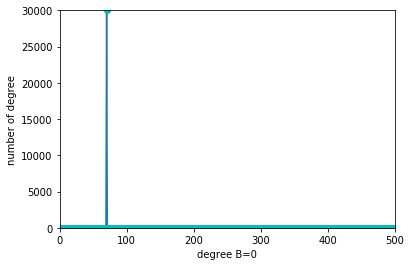

In [19]:
import pylab
import numpy
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 30000)
pylab.xlabel('degree B=0')
pylab.ylabel('number of degree')
pylab.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 55, 377, 2369, 9255, 17940, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

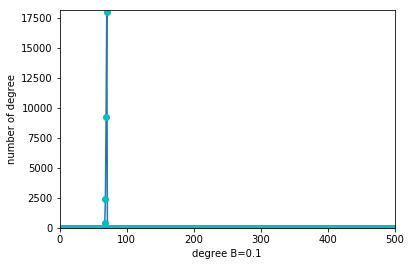

In [38]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0.1) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 18100)
pylab.xlabel('degree B=0.1')
pylab.ylabel('number of degree')
pylab.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 19, 94, 528, 1912, 5919, 11378, 10145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

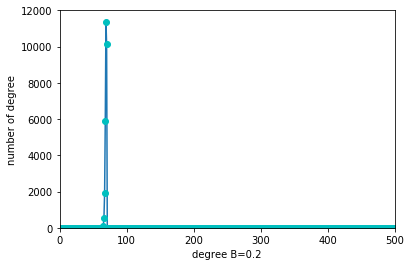

In [39]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0.2) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 12000)
pylab.xlabel('degree B=0.2')
pylab.ylabel('number of degree')
pylab.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 28, 134, 555, 1676, 4213, 8083, 9610, 5697, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

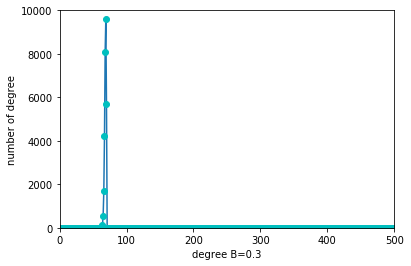

In [40]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0.3) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 10000)
pylab.xlabel('degree B=0.3')
pylab.ylabel('number of degree')
pylab.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 40, 149, 567, 1601, 3561, 6217, 7922, 7113, 2819, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

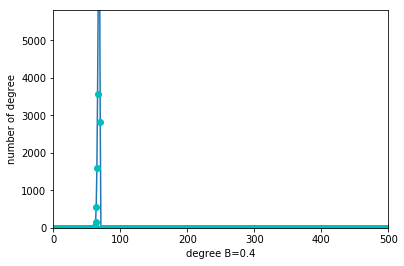

In [37]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0.4) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 5800)
pylab.xlabel('degree B=0.4')
pylab.ylabel('number of degree')
pylab.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 23, 45, 244, 582, 1503, 3006, 5047, 6900, 6771, 4488, 1384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

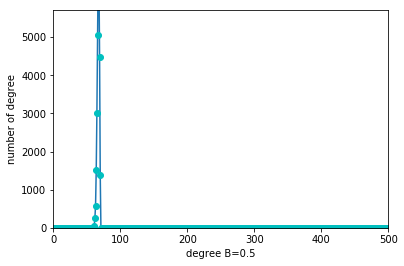

In [36]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0.5) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 5700)
pylab.xlabel('degree B=0.5')
pylab.ylabel('number of degree')
pylab.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 38, 83, 239, 631, 1516, 2690, 4396, 5842, 6252, 4924, 2676, 692, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

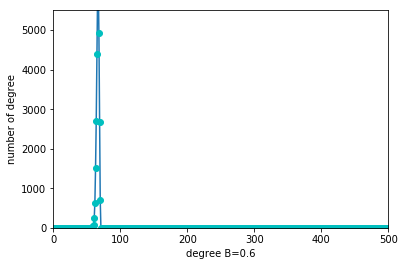

In [35]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0.6) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 5500)
pylab.xlabel('degree B=0.6')
pylab.ylabel('number of degree')
pylab.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 10, 15, 42, 134, 349, 766, 1473, 2660, 3841, 5184, 5528, 4903, 3300, 1488, 305, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

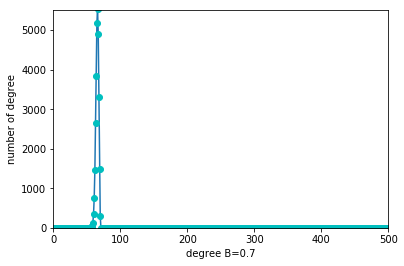

In [34]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0.7) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 5500)
pylab.xlabel('degree B=0.7')
pylab.ylabel('number of degree')
pylab.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 12, 31, 97, 229, 444, 924, 1598, 2443, 3502, 4450, 5009, 4702, 3573, 2042, 789, 149, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

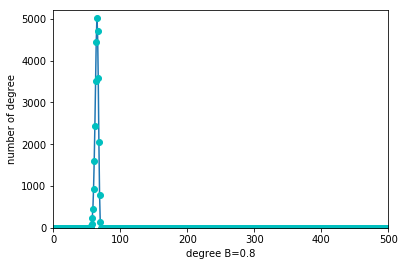

In [33]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0.8) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 5200)
pylab.xlabel('degree B=0.8')
pylab.ylabel('number of degree')
pylab.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 7, 26, 60, 135, 294, 561, 1051, 1597, 2391, 3311, 4020, 4451, 4293, 3607, 2453, 1236, 433, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

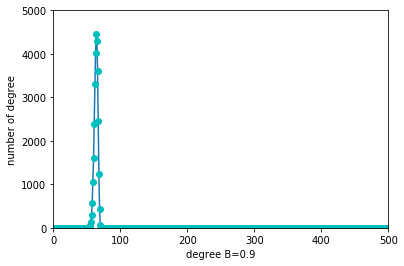

In [32]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,0.9) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 500)
pylab.ylim(0, 5000)
pylab.xlabel('degree B=0.9')
pylab.ylabel('number of degree')
pylab.show()

In [ ]:
x =  numpy.linspace(0,1000,1000)
y =  DegDistWattsStrogatz(1000,70,1) 
print(y)
# compose plot 
pylab.plot(x,y) 
pylab.plot(x,y,'co') 
pylab.xlim(0, 100)
pylab.ylim(0, 4500)
pylab.xlabel('degree B=1')
pylab.ylabel('number of degree')
pylab.show()

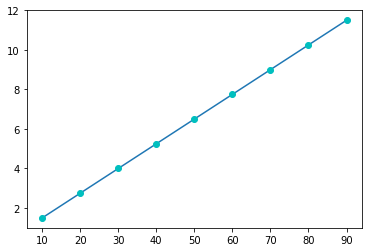

In [119]:
#B
#B=0
g=Graph()
means = []
x = []
for i in range(10,100,10):
    x.append(i)
    G = WattsStrogatz(i,5,0)
    
    sumii = 0
    for j in range(len(G)):
        sumi = 0
        dist = g.dijkstra(G,j)
        for k in range(len(dist)):
            if(k != j):
                 sumi = sumi + dist[k]
        sumii = sumii + sumi
    means.append(sumii/(len(G)*len(G)))   

pylab.plot(x,means) 
pylab.plot(x,means,'co') 
pylab.show()

[1.52, 2.378888888888889, 2.6136, 2.936938775510204, 2.6487654320987652, 3.068099173553719, 3.2367455621301775, 3.09, 3.0844290657439446, 3.3901939058171746]


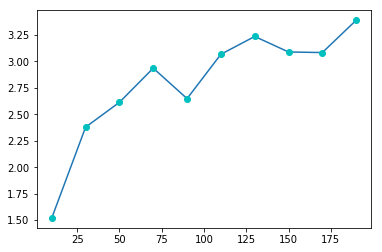

In [117]:
#B
#B=1
g=Graph()
means = []
x = []
for i in range(10,200,20):
    x.append(i)
    G = WattsStrogatz(i,5,1)
    
    sumii = 0
    for j in range(len(G)):
        sumi = 0
        dist = g.dijkstra(G,j)
#         print(dist)
        for k in range(len(dist)):
            if(k != j):
                if(dist[k] != float("Inf") ):
                    sumi = sumi + dist[k]
        sumii = sumii + sumi
    means.append(sumii/(len(G)*len(G)))   
print(means)
pylab.plot(x,means) 
pylab.plot(x,means,'co') 
pylab.show()